In [1]:
# Data loading and exploring 
import pandas as pd

df = pd.read_csv("D:/Masters/Sem 3/Deep learning/data/financialfraud/financialfraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [2]:
df['step'].value_counts()

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64

In [3]:
df.shape

(6362620, 11)

In [4]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [6]:
# one hot encoding the type column 
df1 = pd.get_dummies(df['type'], prefix='type')

df = pd.concat([df, df1], axis=1)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,False,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,False,False,False,True,False


In [7]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT',
       'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

In [8]:
# gettting only useful column for the model 
training_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']
target_col = ['isFraud']

In [9]:
X = df[training_cols]
y = df[target_col]

In [10]:
X

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.00,160296.36,0.00,0.00,False,False,False,True,False
1,1864.28,21249.00,19384.72,0.00,0.00,False,False,False,True,False
2,181.00,181.00,0.00,0.00,0.00,False,False,False,False,True
3,181.00,181.00,0.00,21182.00,0.00,False,True,False,False,False
4,11668.14,41554.00,29885.86,0.00,0.00,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,False,True,False,False,False
6362616,6311409.28,6311409.28,0.00,0.00,0.00,False,False,False,False,True
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,False,True,False,False,False
6362618,850002.52,850002.52,0.00,0.00,0.00,False,False,False,False,True


In [11]:
X[X.columns[0]]

0             9839.64
1             1864.28
2              181.00
3              181.00
4            11668.14
              ...    
6362615     339682.13
6362616    6311409.28
6362617    6311409.28
6362618     850002.52
6362619     850002.52
Name: amount, Length: 6362620, dtype: float64

In [12]:
X.shape

(6362620, 10)

In [13]:
y.shape

(6362620, 1)

In [14]:
y.value_counts()

isFraud
0          6354407
1             8213
Name: count, dtype: int64

In [15]:
y

,isFraud
0,0
1,0
2,1
3,1
4,0
...,...
6362615,1
6362616,1
6362617,1
6362618,1


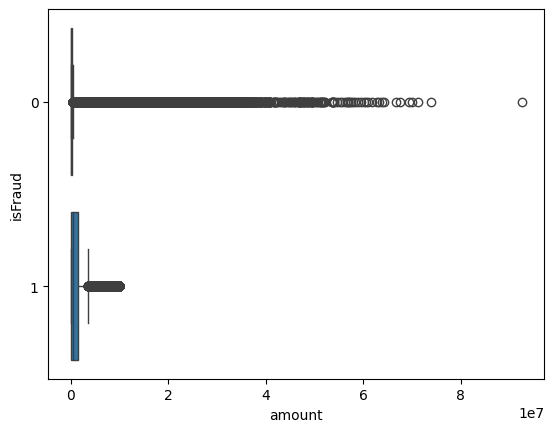

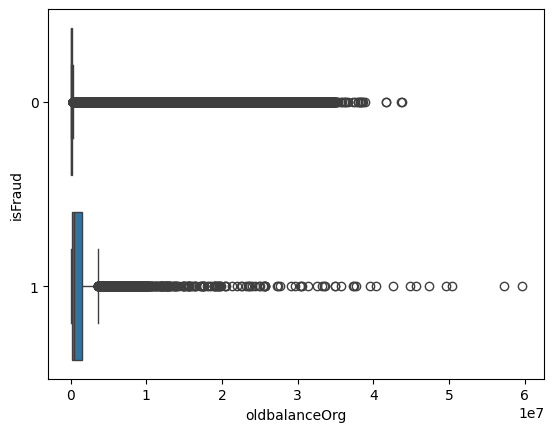

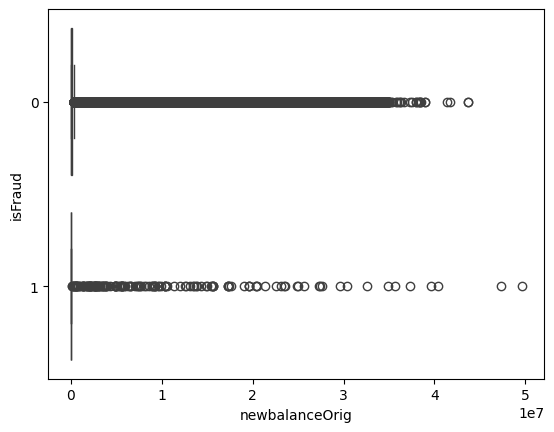

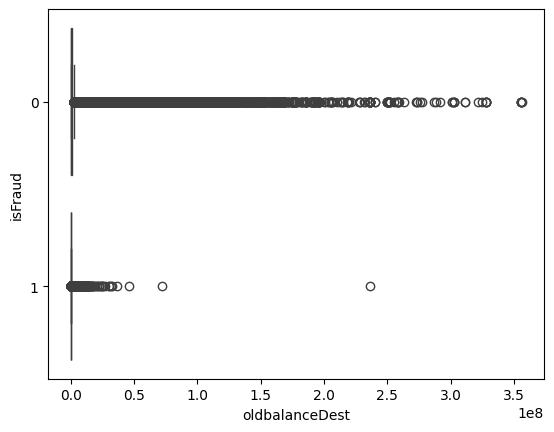

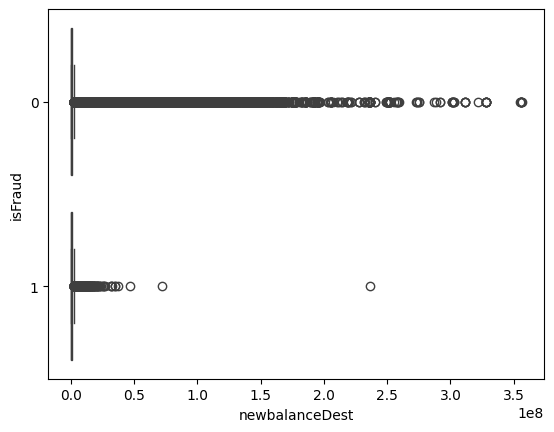

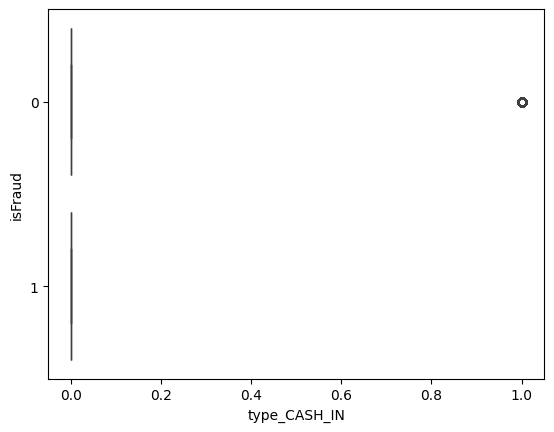

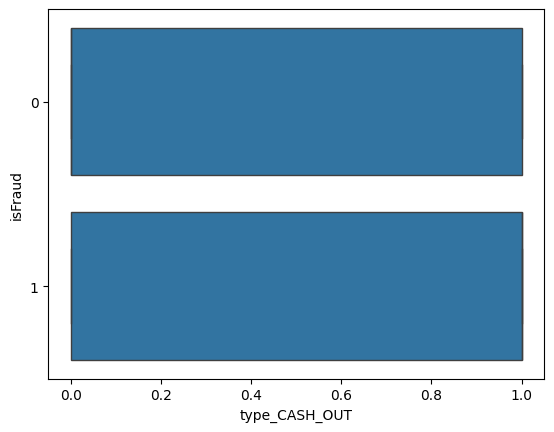

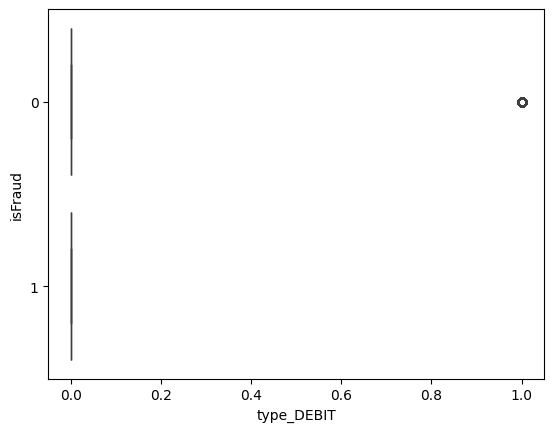

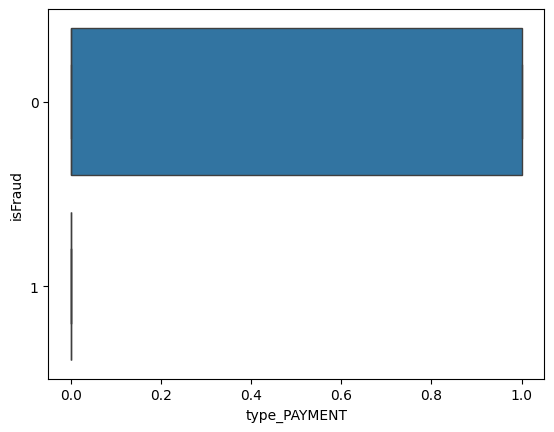

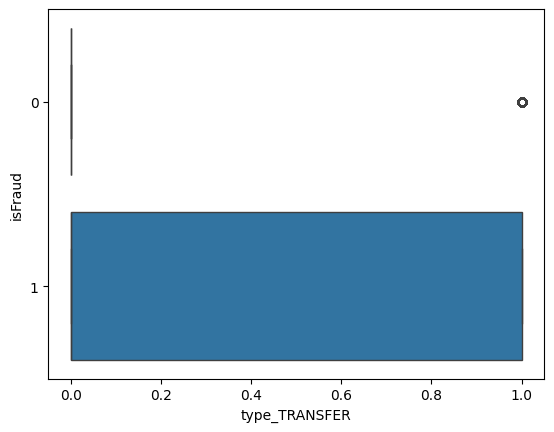

In [16]:
# making box plot to see how the data is distribute meaning to look for outliers 
import seaborn as sns
import matplotlib.pyplot as plt

for c in X.columns:
    sns.boxplot( x=X[c], y=y['isFraud'], orient='h',showfliers = True)
    plt.show()

In [17]:
# data train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (5090096, 10) (5090096, 1)
Testing set shape: (1272524, 10) (1272524, 1)


In [18]:
# scaling the data 
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()
X_train  = pd.DataFrame(scaler.fit_transform(X_train[training_cols]), columns=training_cols)
X_test = pd.DataFrame(scaler.transform(X_test[training_cols]), columns=training_cols)

print(X_train.shape, " ", X_test.shape)

(5090096, 10)   (1272524, 10)


In [19]:
# Encoder and decoder 
import keras
from keras import layers

input_dim = X.shape[1]
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(20, activation='relu')(input_layer)
encoded = layers.Dropout(.3)(encoded)
encoded = layers.Dense(10, activation='relu')(encoded)
encoded = layers.Dropout(.3)(encoded)
encoded = layers.Dense(5, activation='relu')(encoded)

decoded = layers.Dense(10, activation='relu')(encoded)
decoded = layers.Dropout(.5)(decoded)
decoded = layers.Dense(20, activation='relu')(decoded)
decoded = layers.Dropout(.5)(decoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_layer, decoded)
autoencoder.compile(
  loss='mse',
  optimizer='adam',
  metrics=['mse'])

autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 975 (3.81 KB)

 Trainable params: 975 (3.81 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
159066/159066 ━━━━━━━━━━━━━━━━━━━━ 284s 2ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0233 - val_mse: 0.0233
Epoch 2/20
159066/159066 ━━━━━━━━━━━━━━━━━━━━ 289s 2ms/step - loss: 0.0297 - mse: 0.0297 - val_loss: 0.0368 - val_mse: 0.0368
Epoch 3/20
159066/159066 ━━━━━━━━━━━━━━━━━━━━ 294s 2ms/step - loss: 0.0389 - mse: 0.0389 - val_loss: 0.0366 - val_mse: 0.0366


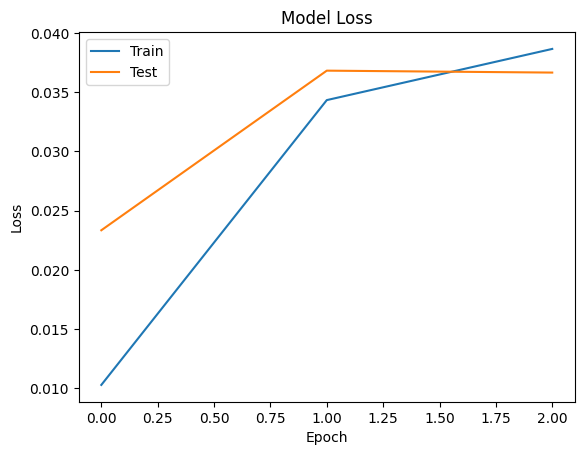

In [20]:
# using ealrly stoping and training the model 
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
history = autoencoder.fit(x=X_train, y=X_train, epochs=20, verbose=1, validation_data=(X_test, X_test), callbacks=[es])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [21]:
pd.crosstab(test_df['Target'], test_df['Outlier'])

NameError: name 'test_df' is not defined

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Extract the encoder part
encoder = keras.Model(inputs=input_layer, outputs=encoded)

# Encode and decode the test data
encoded_data = encoder.predict(X_test)
decoded_data = autoencoder.predict(X_test)

reconstruction_error = np.mean(np.square(X_test - decoded_data), axis=1)
mean_reconstruction_error = np.mean(reconstruction_error)
print(f"Mean Reconstruction Error: {mean_reconstruction_error:.6f}")

39767/39767 ━━━━━━━━━━━━━━━━━━━━ 28s 714us/step
39767/39767 ━━━━━━━━━━━━━━━━━━━━ 29s 737us/step
Mean Reconstruction Error: 0.023346


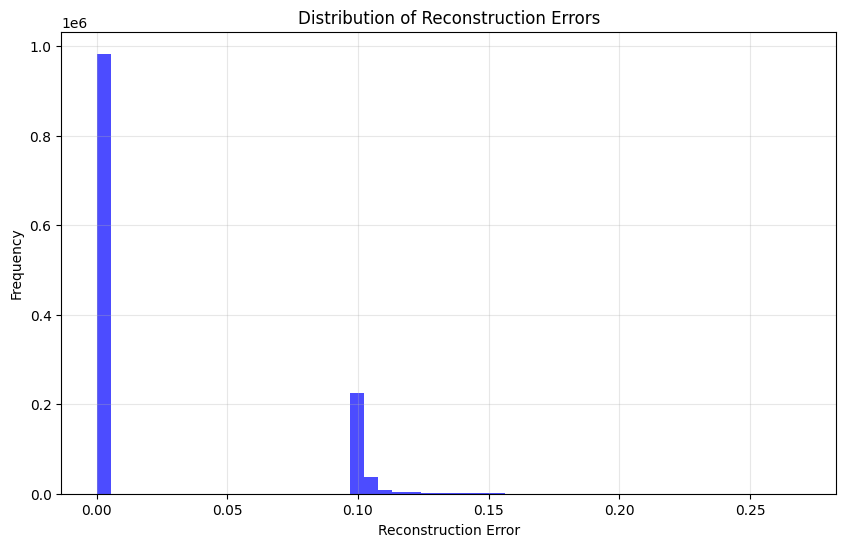

In [24]:
# Error Distribution
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_error, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Reconstruction Errors')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

In [25]:
# setting the treshold 
threshold = np.percentile(reconstruction_error, 99)  # 99th percentile as threshold
print(f"Anomaly Threshold: {threshold:.6f}")

Anomaly Threshold: 0.117977


In [26]:
# Classify anomalies
is_anomaly = reconstruction_error > threshold
num_anomalies = np.sum(is_anomaly)
print(f"Number of Anomalies Detected: {num_anomalies}")
print(f"Percentage of Anomalies: {(num_anomalies / len(reconstruction_error) * 100):.8f}%")

Number of Anomalies Detected: 12726
Percentage of Anomalies: 1.00005972%


In [27]:
# Performance Metrics
true_anomalies = y_test['isFraud'] == 1  # Assuming 1 is fraud
detected_anomalies = is_anomaly

true_positives = np.sum((true_anomalies == 1) & (detected_anomalies == True))
false_positives = np.sum((true_anomalies == 0) & (detected_anomalies == True))
false_negatives = np.sum((true_anomalies == 1) & (detected_anomalies == False))

precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Precision: {precision:.10f}")
print(f"Recall: {recall:.10f}")
print(f"F1 Score: {f1_score:.10f}")

Precision: 0.0015372790
Recall: 0.0120120120
F1 Score: 0.0027257240


In [28]:
# Compute reconstruction error on training data to set the threshold
train_predicted_x = autoencoder.predict(X_train)
train_events_mse = keras.losses.mean_squared_error(X_train, train_predicted_x)
cut_off = np.percentile(train_events_mse, 99)
print(f"Cut-off Threshold (99th percentile): {cut_off:.6f}")

159066/159066 ━━━━━━━━━━━━━━━━━━━━ 117s 737us/step
Cut-off Threshold (99th percentile): 0.117936


In [29]:
# Predict on test data
predicted = autoencoder.predict(X_test)
ms = keras.losses.mean_squared_error(X_test, predicted)

39767/39767 ━━━━━━━━━━━━━━━━━━━━ 30s 742us/step


In [30]:
# DataFrame for evaluation
test_df = pd.DataFrame(X_test, columns=X_test.columns)
print("Test DataFrame Columns:", test_df.columns)
test_df['Target'] = y_test
test_df['MSE'] = ms
test_df['Outlier'] = test_df['MSE'] > cut_off

Test DataFrame Columns: Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT',
       'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')


In [31]:
# Evaluate the results
print("\nOutlier Value Counts:")
print(test_df['Outlier'].value_counts())
print("\nTarget Value Counts:")
print(test_df['Target'].value_counts())
print("\nTarget Null Check:")
print(test_df['Target'].isnull().value_counts())
print("\nTest DataFrame Shape:", test_df.shape)

# Crosstab of Target vs. Outlier
print("\nCrosstab of Target vs. Outlier:")
pd.crosstab(test_df['Target'], test_df['Outlier'])


Outlier Value Counts:
Outlier
False    1259763
True       12761
Name: count, dtype: int64

Target Value Counts:
Target
0.0    254003
1.0       333
Name: count, dtype: int64

Target Null Check:
Target
True     1018188
False     254336
Name: count, dtype: int64

Test DataFrame Shape: (1272524, 13)

Crosstab of Target vs. Outlier:


Outlier,False,True
Target,,
0.0,251400,2603
1.0,329,4
